In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [276]:
df = pd.read_excel(r"DSjobs.xlsx")

In [277]:
df.rename(columns={'percentage of job description that contain artificial intelligence or machine learning ': 'AI and ML', 'percentage of jobs open after 60 days': 'Jobs open'}, inplace=True)

In [278]:
df

,Jobs,AI and ML,Jobs open,Average Salary
0,Machine Learning Engineer,94.2,40.8,134449
1,Data Scientist,75.1,33.0,130503
2,Computer Vision Engineer,64.6,45.2,134346
3,Alorithm Engineer,37.4,48.6,104112
4,Principal Scientist,28.8,46.4,138271
5,Computer Scientist,27.6,63.8,97850
6,Research Engineer,24.3,44.1,71600
7,Statistician,24.0,29.0,83731
8,Director of analytics,23.3,34.5,140837
9,Data Engineer,22.1,34.8,125999


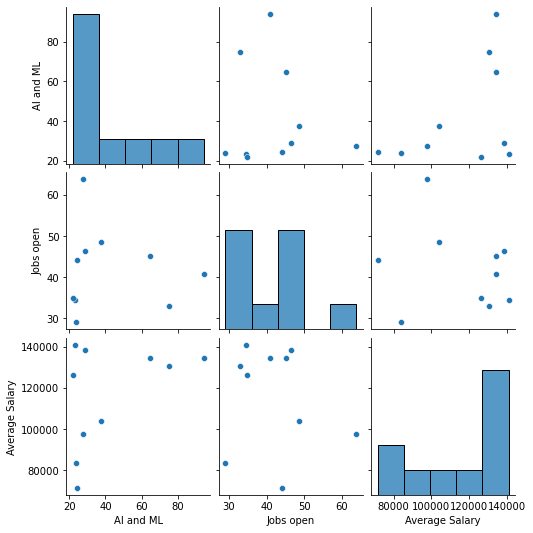

In [279]:
sns.pairplot(df)

In [280]:
x = df[["AI and ML", "Average Salary"]]
y = df["Jobs open"]

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [283]:
from sklearn.linear_model import LinearRegression

In [284]:
model = LinearRegression()

In [285]:
model.fit(x_train, y_train)

LinearRegression()

In [286]:
print(model.coef_)

[0.0111179  0.00040731]


In [287]:
print(model.intercept_)

-17.226102857068696


In [288]:
pd.DataFrame(model.coef_, x.columns, columns = ['coeff'])

,coeff
AI and ML,0.011118
Average Salary,0.000407


In [289]:
predictions = model.predict(x_test)

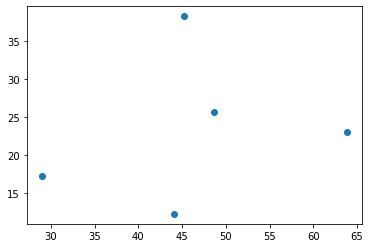

In [290]:
plt.scatter(y_test, predictions)

(array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1.]),
 array([ 6.98710167, 10.37476504, 13.76242841, 17.15009178, 20.53775515,
        23.92541852, 27.31308189, 30.70074527, 34.08840864, 37.47607201,
        40.86373538]),
 <BarContainer object of 10 artists>)

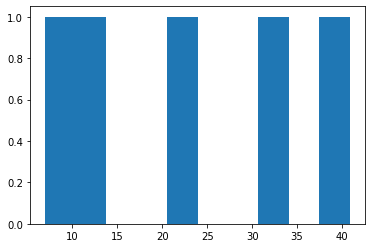

In [291]:
plt.hist(y_test - predictions)

In [292]:
mlr_df = pd.DataFrame({"AI an ML": x_test["AI and ML"], "Average Salary": x_test["Average Salary"], "Actual value": y_test, "Predicted_value": predictions, "Difference": y_test - predictions})

In [293]:
print(mlr_df)

   AI an ML  Average Salary  Actual value  Predicted_value  Difference
7      24.0           83731          29.0        17.145397   11.854603
3      37.4          104112          48.6        25.595810   23.004190
2      64.6          134346          45.2        38.212898    6.987102
5      27.6           97850          63.8        22.936265   40.863735
6      24.3           71600          44.1        12.207626   31.892374
